# Project Housing:

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.width', 1000)

# Plotting Tools
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Import Sci-Kit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [136]:
#Loading the dataset:
train=pd.read_csv("train.csv.xlsx")
test=pd.read_csv("test.csv.xlsx")

In [137]:
#checking upper rows:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice
0  127         120       RL          NaN     4928   Pave   NaN      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0      2   2007        WD         Normal     128000
1  889          20       RL         95.0    15865   Pave   NaN      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0     10   2007        WD         Normal     268000
2  793          60       RL         92.0     9920   Pave   NaN      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0      6   2007        WD         Normal     269790
3  110          20       RL        105.0    11751   Pave   NaN      IR1         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0      1   2010       COD         Normal     190000
4  422          20       RL          NaN    16635   Pave   NaN      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0      6   2009        WD         Normal     215000

[5 rows x 81 columns]

In [138]:
test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition
0   337          20       RL         86.0    14157   Pave   NaN      IR1         HLS    AllPub  ...           0        0    NaN   NaN         NaN       0      7    2007        WD         Normal
1  1018         120       RL          NaN     5814   Pave   NaN      IR1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN       0      8    2009       COD        Abnorml
2   929          20       RL          NaN    11838   Pave   NaN      Reg         Lvl    AllPub  ...           0        0    NaN   NaN         NaN       0      6    2009        WD         Normal
3  1148          70       RL         75.0    12000   Pave   NaN      Reg         Bnk    AllPub  ...           0        0    NaN   NaN         NaN       0      7    2009        WD         Normal
4  1227          60       RL         86.0    14598   Pave   NaN      IR1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN       0      1    2008        WD         Normal

[5 rows x 80 columns]

In [139]:
#checking datatype:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [140]:
#checking datatype:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [141]:
# Checking shape:
train.shape

(1168, 81)

In [142]:
# Checking shape:
test.shape

(292, 80)

# Data Exploration and Cleaning

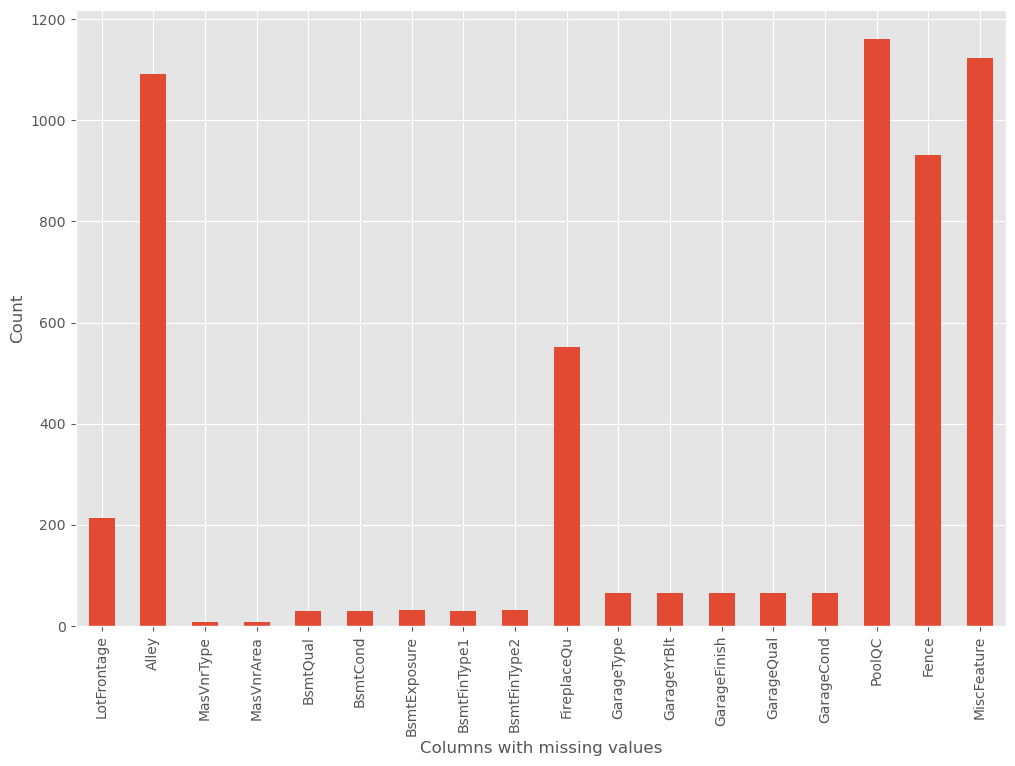

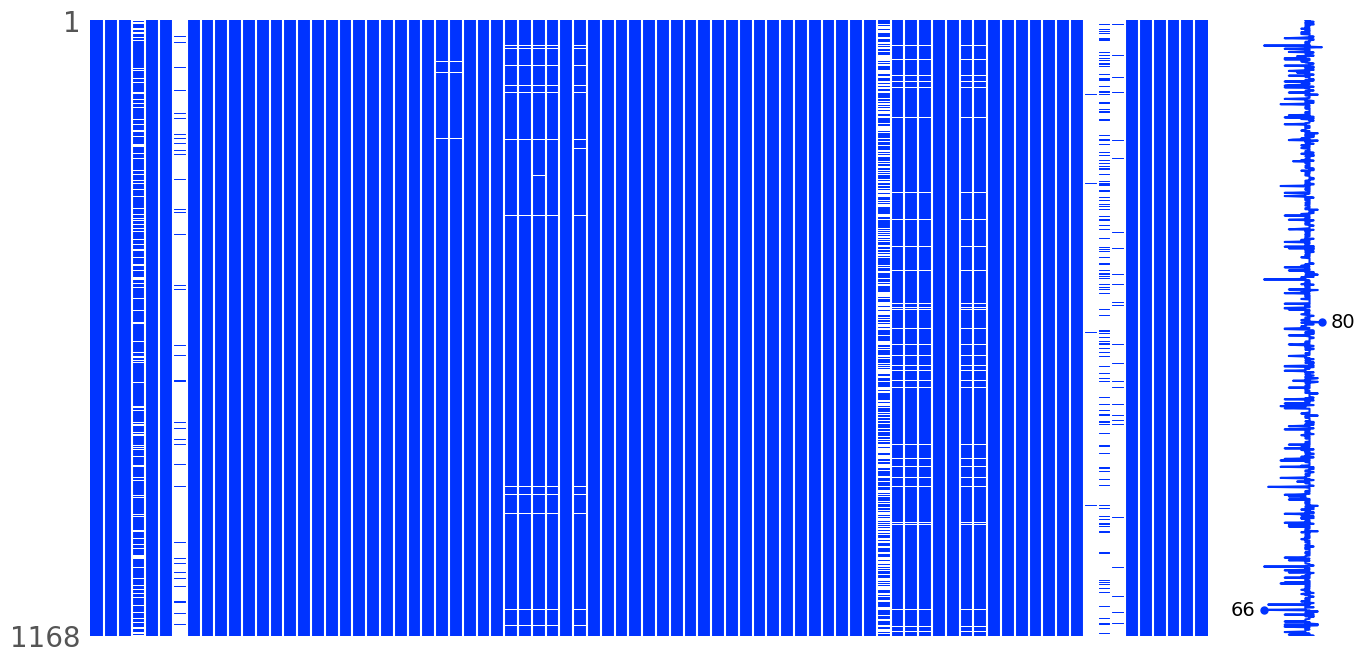

In [143]:
# Plot missing values 


def plot_missing(df):
    # Find columns having missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    #missing.sort_values(inplace=True)
    
    # Plot missing values by count 
    missing.plot.bar(figsize=(12,8))
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count')
    
    # search for missing data
    import missingno as msno
    msno.matrix(df=df, figsize=(16,8), color=(0,0.2,1))
    
plot_missing(train)

In [144]:
#Fixing the missing data


# # IMPUTING MISSING VALUES
def fill_missing_values(df):
    ''' This function imputes missing values with median for numeric columns 
        and most frequent value for categorical columns'''
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    for column in list(missing.index):
        if df[column].dtype == 'object':
            df[column].fillna(df[column].value_counts().index[0], inplace=True)
        elif df[column].dtype == 'int64' or 'float64' or 'int16' or 'float16':
            df[column].fillna(df[column].median(), inplace=True)

In [145]:
fill_missing_values(train)
train.isnull().sum().max()

0

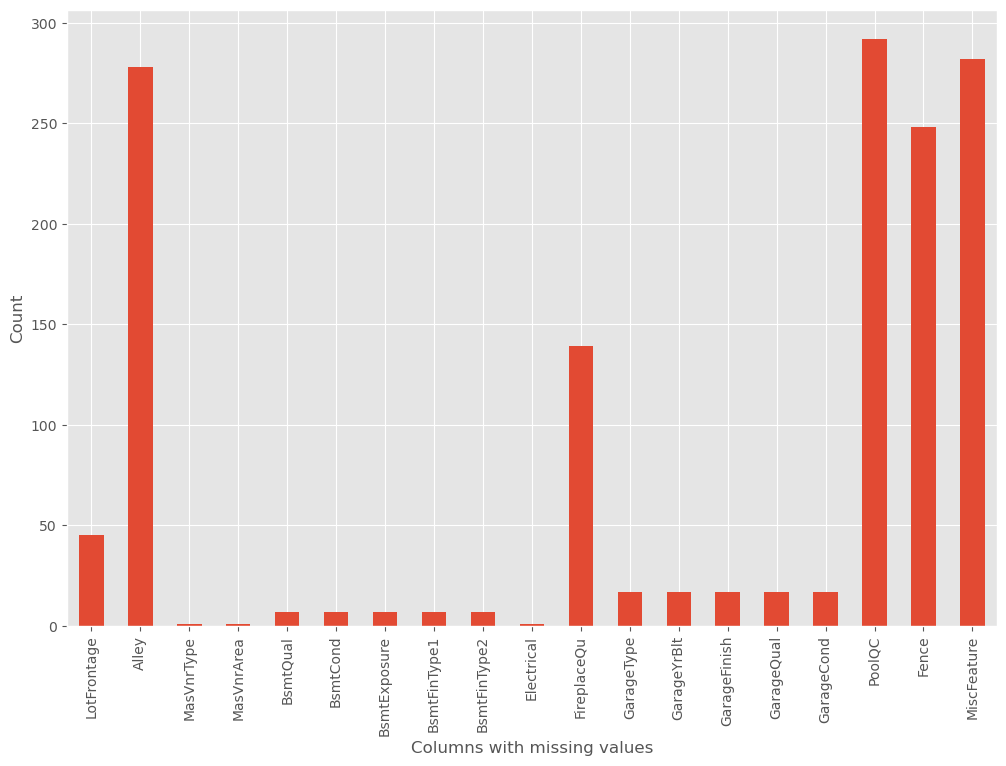

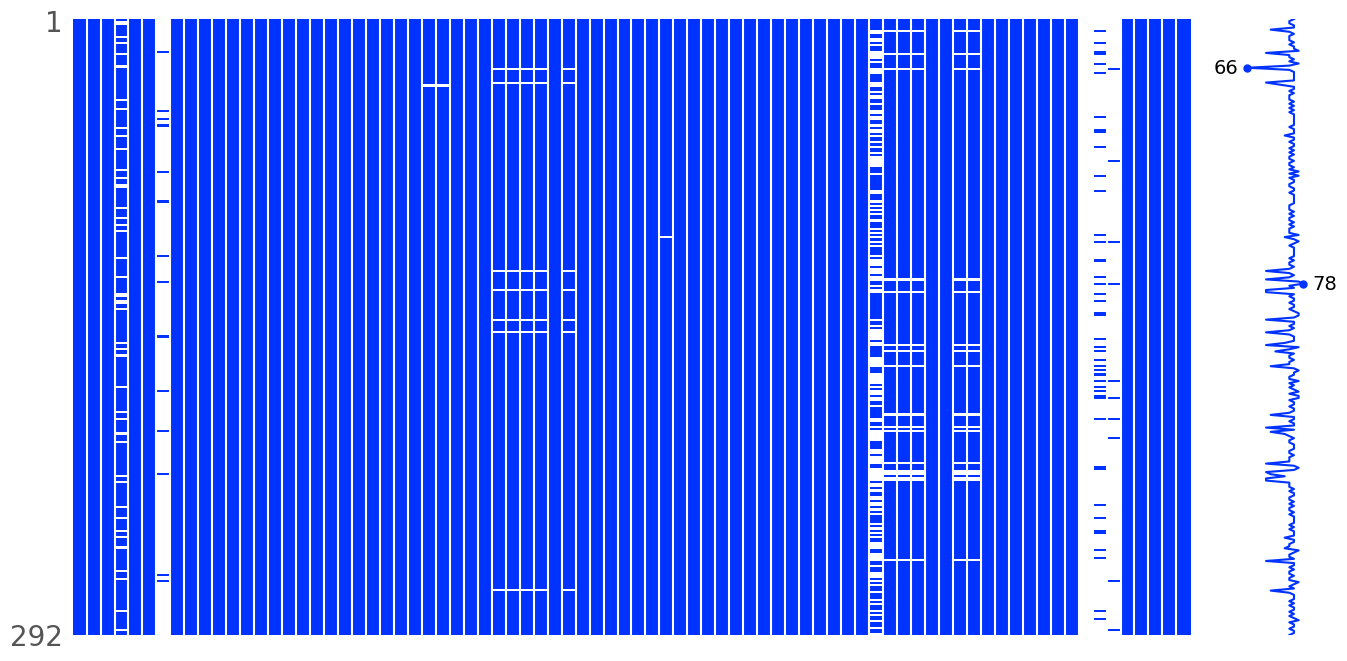

In [146]:
# Plot missing values 


def plot_missing(df):
    # Find columns having missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    #missing.sort_values(inplace=True)
    
    # Plot missing values by count 
    missing.plot.bar(figsize=(12,8))
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count')
    
    # search for missing data
    import missingno as msno
    msno.matrix(df=df, figsize=(16,8), color=(0,0.2,1))
    
plot_missing(test)

In [147]:
#Fixing the missing data


# # IMPUTING MISSING VALUES
def fill_missing_values(df):
    ''' This function imputes missing values with median for numeric columns 
        and most frequent value for categorical columns'''
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    for column in list(missing.index):
        if df[column].dtype == 'object':
            df[column].fillna(df[column].value_counts().index[0], inplace=True)
        elif df[column].dtype == 'int64' or 'float64' or 'int16' or 'float16':
            df[column].fillna(df[column].median(), inplace=True)

In [148]:
fill_missing_values(test)
test.isnull().sum().min()

0

In [149]:
def impute_cats(df):
    '''This function converts categorical and non-numeric 
       columns into numeric columns to feed into a ML algorithm'''
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers    
    label_enc = LabelEncoder()
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])

In [150]:
# Impute the missing values
impute_cats(train)
impute_cats(test)
print("Train Dtype counts: \n{}".format(train.dtypes.value_counts()))
print("Test Dtype counts: \n{}".format(test.dtypes.value_counts()))

Train Dtype counts: 
int32      43
int64      35
float64     3
dtype: int64
Test Dtype counts: 
int32      42
int64      34
float64     4
dtype: int64


In [151]:
#check null values in the dataframe: 
train.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice
0     False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
1     False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
2     False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
3     False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
4     False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
...     ...         ...       ...          ...      ...     ...    ...       ...          ...        ...  ...       ...     ...    ...          ...      ...     ...     ...       ...            ...        ...
1163  False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
1164  False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
1165  False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
1166  False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False
1167  False       False     False        False    False   False  False     False        False      False  ...     False   False  False        False    False   False   False     False          False      False

[1168 rows x 81 columns]

In [152]:
test.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition
0    False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
1    False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
2    False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
3    False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
4    False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
..     ...         ...       ...          ...      ...     ...    ...       ...          ...        ...  ...          ...       ...     ...    ...          ...      ...     ...     ...       ...            ...
287  False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
288  False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
289  False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
290  False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False
291  False       False     False        False    False   False  False     False        False      False  ...        False     False    True  False        False    False   False   False     False          False

[292 rows x 80 columns]

In [153]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
SalePrice          int64
Length: 81, dtype: object

# Lineplot:

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

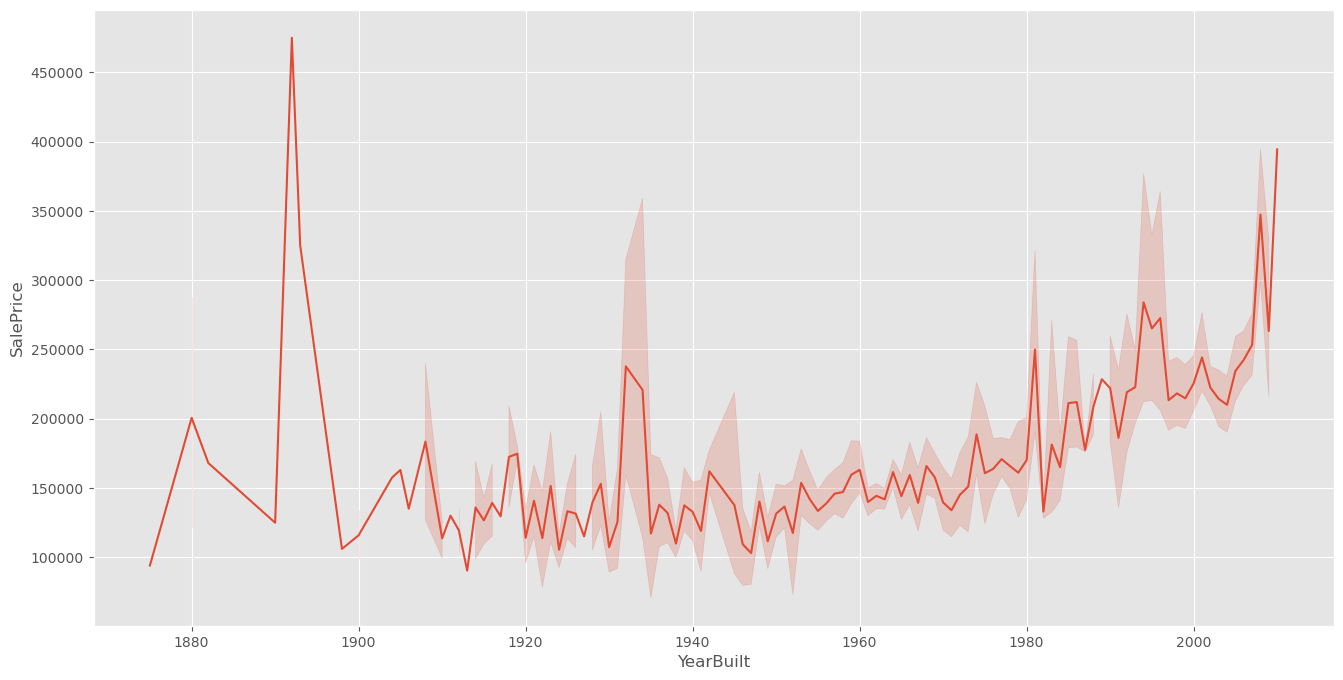

In [154]:
f, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x='YearBuilt', y='SalePrice', data=train)

You might have noticed a significant increase in SalePrices just after the start of the 21st century,
    "which is pretty interesting. What's even more surprising is the late 1800s saw phenomenal increase in 
    "SalePrices but dropping way below even before the end of that century."

# Visualizing the relationship between Sale prices and Overall Quality"

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

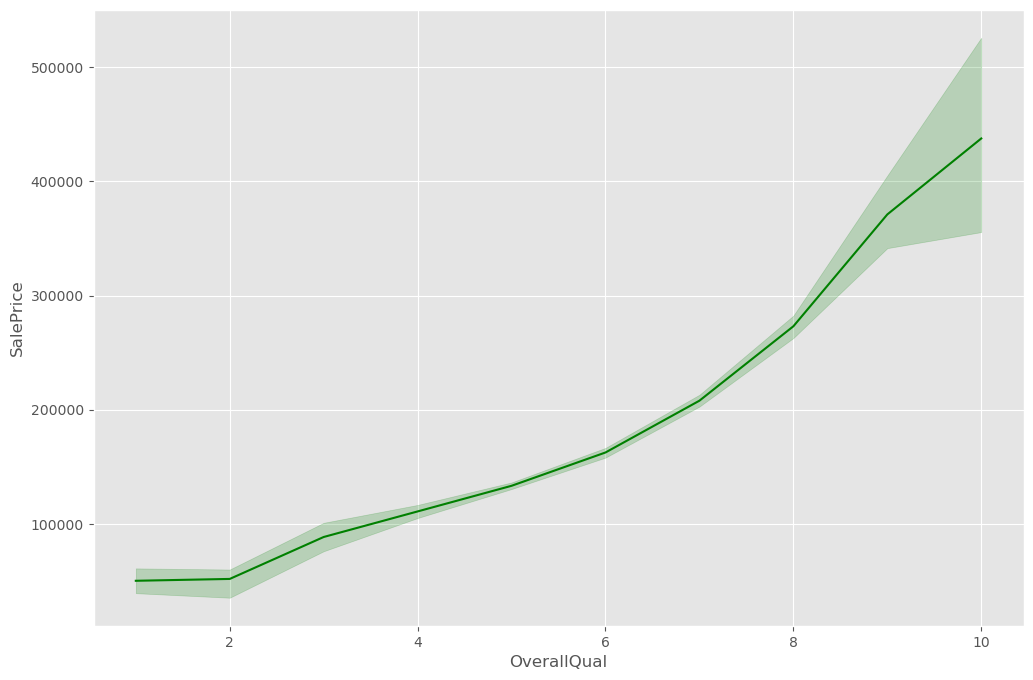

In [155]:
ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='OverallQual', y='SalePrice', color='green',data=train)

# Visulizing the Distribution of SalePrice.

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

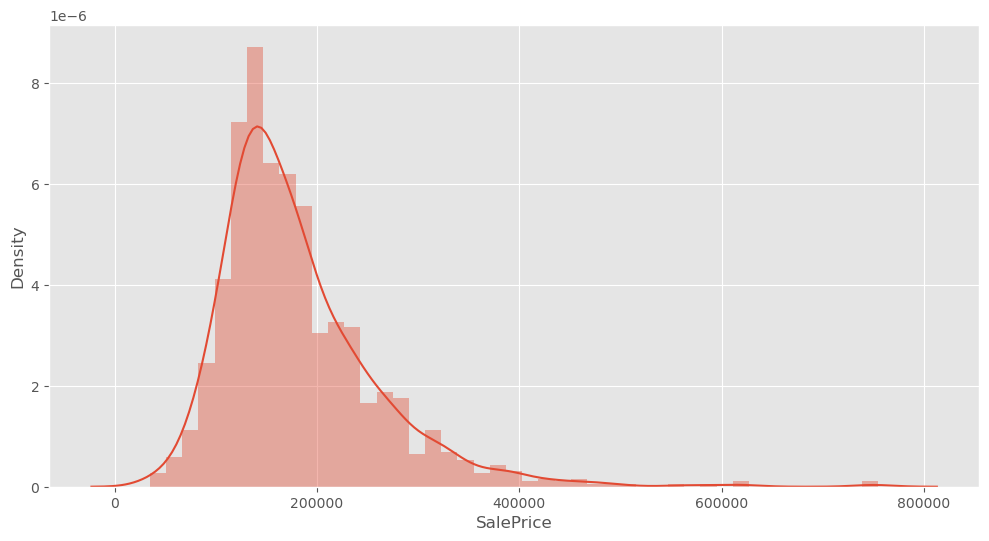

In [156]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(train['SalePrice'])

# Visualizing the relationship between SalePrice and SaleType

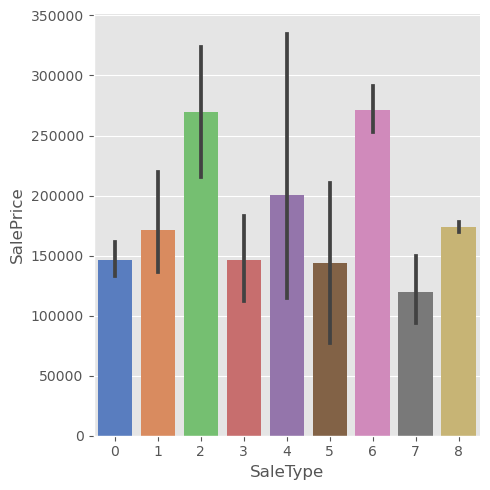

In [157]:
sns.catplot(x='SaleType', y='SalePrice', data=train, kind='bar', palette='muted')

# labelEncoder:

In [158]:
from sklearn.preprocessing import LabelEncoder
#Fit the transform
LE=LabelEncoder()
train["SalePrice"]=LE.fit_transform(train["SalePrice"])
test["SaleCondition"]=LE.fit_transform(test["SaleCondition"])

In [159]:
train.SalePrice.value_counts()

175    18
153    16
220    12
169    11
236    11
       ..
355     1
190     1
2       1
287     1
306     1
Name: SalePrice, Length: 581, dtype: int64

In [160]:
test.SaleCondition.value_counts()

2    253
0     20
3     17
1      2
Name: SaleCondition, dtype: int64

In [161]:
#Checking correlation:

In [162]:
# Correlation matrix:

In [163]:
corr_mat=train.corr()
# size of the canvas
plt.figure(figsize=[100,100]) # plot the matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.jpg")
plt.show()

In [164]:
# Observations : we are unable to identify the correlation in above heatmap due to huge number of columns.
# lET'S Print the correlation values of independent variables with target variable in sorted form.

In [165]:
corr_matrix=train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.817104
GrLivArea       0.693930
GarageCars      0.669420
GarageArea      0.641958
                  ...   
KitchenQual    -0.557568
BsmtQual       -0.595951
ExterQual      -0.599561
GarageFinish   -0.601393
Utilities            NaN
Name: SalePrice, Length: 81, dtype: float64

# OverallQual has highest +positive correlation.
GarageFinish has highest  -negative correlation.

# Bivariate Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>

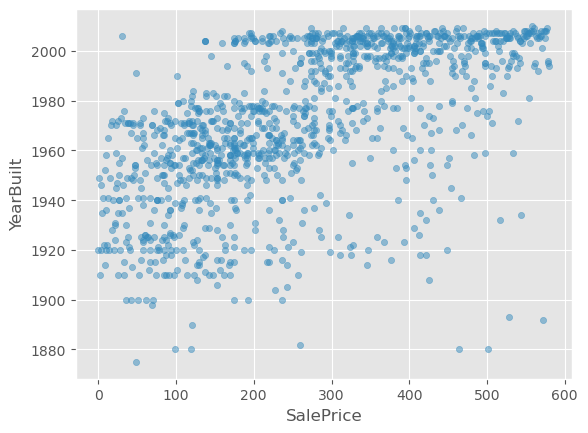

In [258]:
train.plot(kind='scatter', x='SalePrice', y='YearBuilt', alpha=0.5)

In [ ]:
we can  see  the  in the plot darker spots in  2000 (200-600).

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

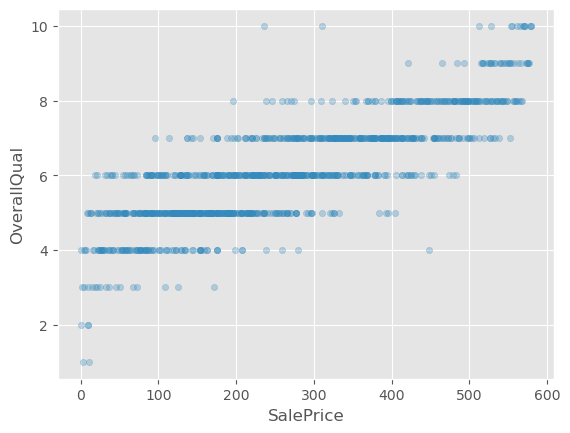

In [259]:
train.plot(kind='scatter', x='SalePrice', y='OverallQual', alpha=0.3)

In [ ]:
we can see lines clear  at point 4,6,8 and a few other ones.

<AxesSubplot:xlabel='SalePrice', ylabel='SaleCondition'>

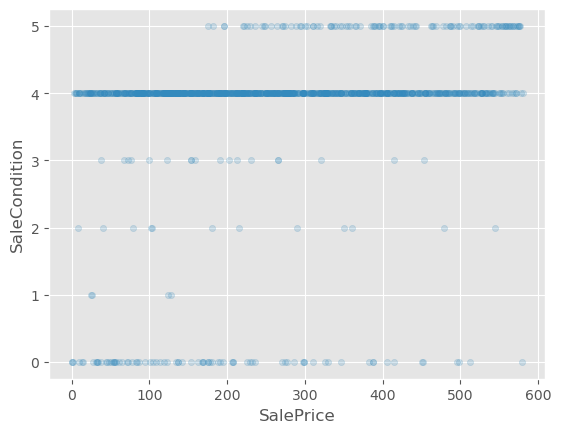

In [260]:
train.plot(kind='scatter', x='SalePrice', y='SaleCondition', alpha=0.2)

In [ ]:
We can see there are a number of "horizontal lines" in the plot: one clear one at point 4 ,one at
 5 and a few other ones.

<AxesSubplot:xlabel='SalePrice', ylabel='SaleType'>

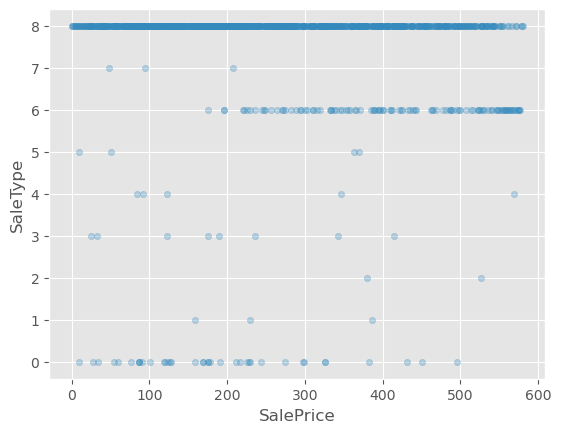

In [261]:
train.plot(kind='scatter', x='SalePrice', y='SaleType', alpha=0.3)

In [ ]:
we can see in the plot clear line at point 8, and lightly at 6 and a few other ones.

# Distplot:

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


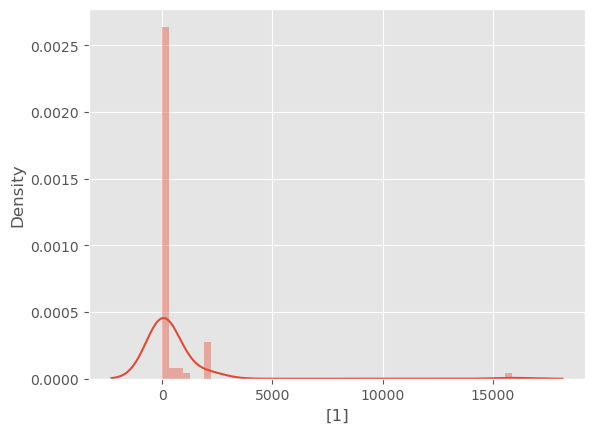

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


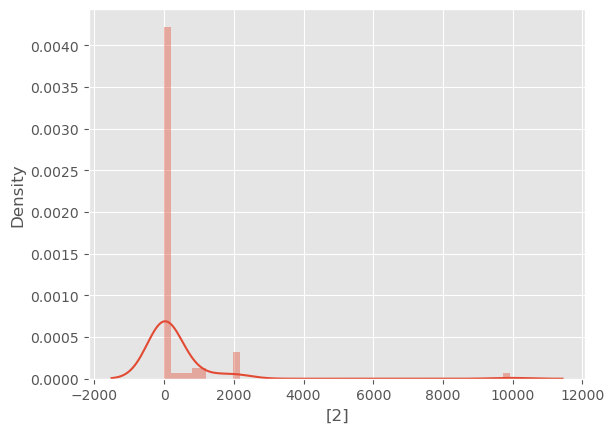

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


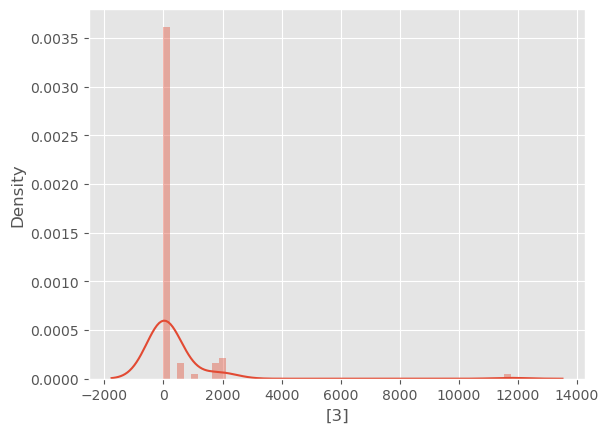

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


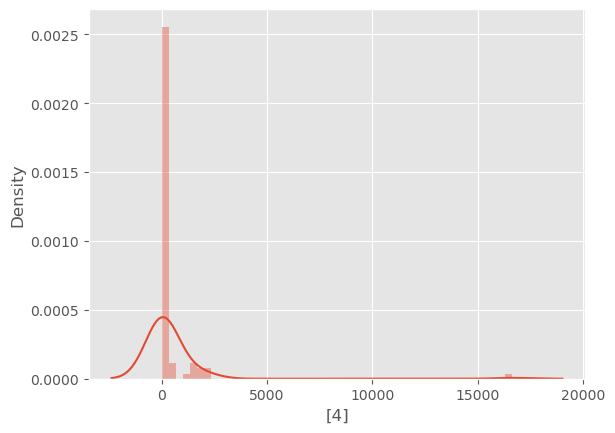

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


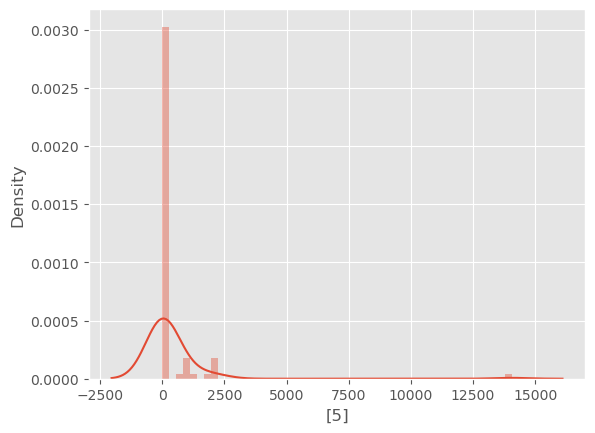

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


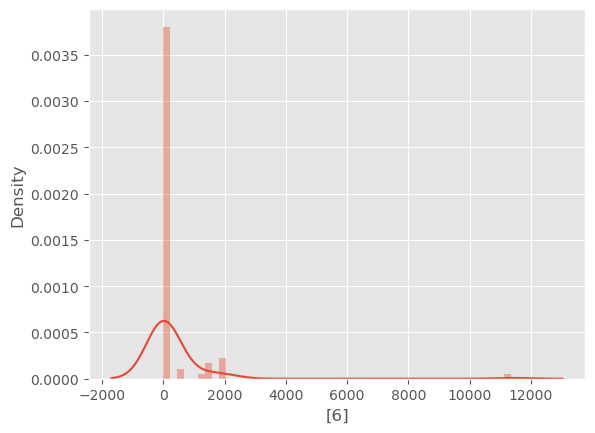

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


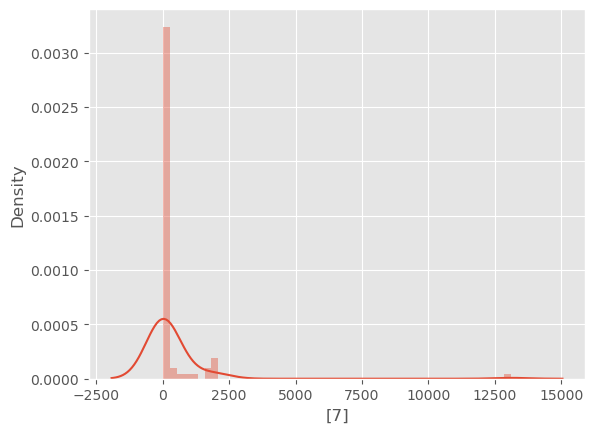

C:\Users\md\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


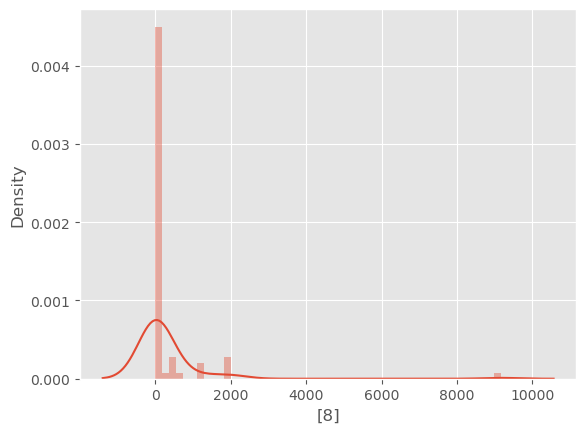

In [169]:
#distplot:
x2 = x.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel([i])
        plt.show()

# Preprocessing:

# Splitting the independent and target variables in x and y before removing the skewness.

In [166]:
x=train.drop("SalePrice",axis=1)
y=train["SalePrice"]

In [167]:
x

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition
0     127         120         3         70.0     4928       1      0         0            3          0  ...            0         0       2      2            2        0       2    2007         8              4
1     889          20         3         95.0    15865       1      0         0            3          0  ...          224         0       2      2            2        0      10    2007         8              4
2     793          60         3         92.0     9920       1      0         0            3          0  ...            0         0       2      2            2        0       6    2007         8              4
3     110          20         3        105.0    11751       1      0         0            3          0  ...            0         0       2      2            2        0       1    2010         0              4
4     422          20         3         70.0    16635       1      0         0            3          0  ...            0         0       2      2            2        0       6    2009         8              4
...   ...         ...       ...          ...      ...     ...    ...       ...          ...        ...  ...          ...       ...     ...    ...          ...      ...     ...     ...       ...            ...
1163  289          20         3         70.0     9819       1      0         0            3          0  ...            0         0       2      2            2        0       2    2010         8              4
1164  554          20         3         67.0     8777       1      0         3            3          0  ...            0         0       2      2            2        0       5    2009         8              4
1165  196         160         3         24.0     2280       1      0         3            3          0  ...            0         0       2      2            2        0       7    2009         8              4
1166   31          70         0         50.0     8500       1      1         3            3          0  ...            0         0       2      2            2        0       7    2008         8              4
1167  617          60         3         70.0     7861       1      0         0            3          0  ...            0         0       2      2            2        0       6    2006         8              4

[1168 rows x 80 columns]

In [168]:
y

0       129
1       468
2       470
3       326
4       379
       ... 
1163    114
1164     76
1165    200
1166      4
1167    306
Name: SalePrice, Length: 1168, dtype: int64

# checking skewness:

In [170]:
x.skew().sort_values(ascending=False)#distplot:


MiscVal        23.065943
PoolArea       13.243711
Condition2     11.514458
LotArea        10.659285
Heating        10.103609
                 ...    
GarageQual     -4.582386
GarageCond     -5.422472
Street        -17.021969
MiscFeature   -17.238424
PoolQC        -19.401558
Length: 80, dtype: float64

In [171]:
#To remove the skewness:

In [172]:
from sklearn.preprocessing import power_transform,PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x)
x_new_pt

C:\Users\md\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\md\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\md\anaconda3\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

In [173]:
#This will convert the numpy array in PowerTrnasform :

In [174]:
x_new=power_transform(x)
x_new

C:\Users\md\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\md\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\md\anaconda3\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

In [175]:
#Checking skewness 

In [176]:
pd.DataFrame(x_new,columns=x.columns)
x.skew().sort_values(ascending=False)

MiscVal        23.065943
PoolArea       13.243711
Condition2     11.514458
LotArea        10.659285
Heating        10.103609
                 ...    
GarageQual     -4.582386
GarageCond     -5.422472
Street        -17.021969
MiscFeature   -17.238424
PoolQC        -19.401558
Length: 80, dtype: float64

# convert the transform value into  the  dataset,we will get the  values in  the form  of x.

In [177]:
x=train
x=x_new

After the  transformer (Now It contained the  transformed value) 

In [178]:
x=pd.DataFrame (x_new) 
x.skew().sort_values(ascending=False)

71    12.817372
74     9.291637
69     7.087955
45     6.922843
6      5.436187
        ...    
39    -4.541694
64    -4.925781
22    -6.314987
72   -17.021969
5    -17.021969
Length: 80, dtype: float64

In [179]:
#Now,Transformation id done and skewness is removed

# Now  validating  that  skewness has  been  removed  or not.

In [180]:
x.skew().sort_values(ascending=False)
sk=x.skew()
sk

0    -0.268486
1     0.064007
2     0.233113
3     0.155904
4     0.032509
        ...   
75    4.991071
76   -0.035838
77    0.112893
78   -2.067563
79   -0.353292
Length: 80, dtype: float64

In [181]:
#convert negative into positive:

In [182]:
sk[np.abs(sk)<0.00003]

9    0.0
dtype: float64

In [183]:
#checking all  convert together:

In [184]:
sk[np.abs(sk)<0.00003].all()

False

# Checking  Outliers:

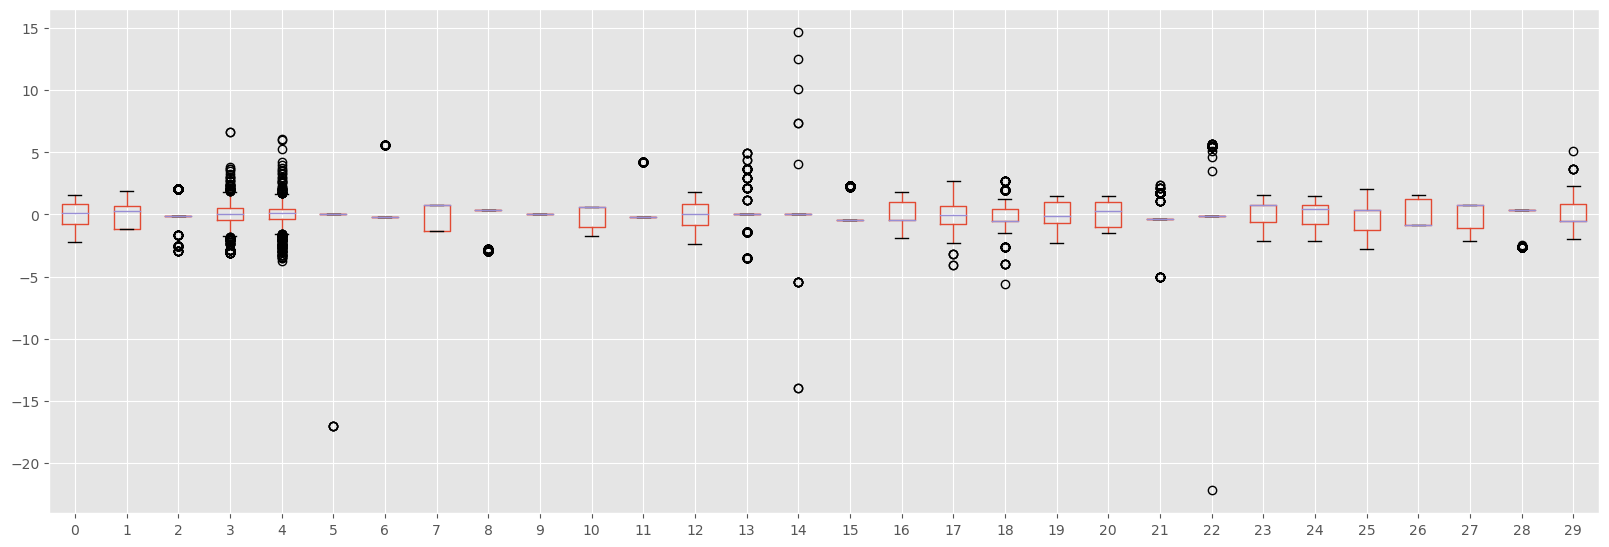

In [186]:
x.iloc[:,0:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Let's Quantify:

In [188]:
from  scipy.stats  import  zscore
(np.abs(zscore(x))).all().all()


True

In [189]:
(np.abs(zscore(x))<3).all().all()

False

# Normalizing/Scalling the data  


In [190]:
## normalizing/Scalling the data  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(X)
#X = scaler.transform(X)
#X = pd.DataFrame(X)

In [191]:
#checking upper 2 rows:
x.head(2)

0         1         2         3         4         5         6         7         8    9   ...        70        71        72        73        74        75        76        77        78        79
0 -1.544968  1.370435 -0.162456  0.057324 -1.213954  0.058621 -0.178331 -1.366794  0.341434  0.0  ... -0.297551 -0.077648  0.058621  0.177447  0.010754 -0.193133 -1.719437 -0.604806  0.409069  0.029735
1  0.461941 -1.167999 -0.162456  1.125853  1.100521  0.058621 -0.178331 -1.366794  0.341434  0.0  ...  3.360787 -0.077648  0.058621  0.177447  0.010754 -0.193133  1.320612 -0.604806  0.409069  0.029735

[2 rows x 80 columns]

In [192]:
#checking upper 2 rows:
y.head(2)

0    129
1    468
Name: SalePrice, dtype: int64

# Find Best RandomState

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [194]:

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
    
lr=LogisticRegression()
lr.fit(x_train,y_train)
#fitting  the  data will  train your  model
predlr=lr.predict(x_test)
#this is the  predicted  targetv v ariable
acc=accuracy_score(y_test,predlr)
 #accurac y_score
print('testing accuracy',acc,"random_state",i)

if acc>maxAccu:
    maxAccu=acc
    maxRS=i
    print('max_accuracy',maxAccu,'max_random_state',i)

testing accuracy 0.004273504273504274 random_state 199
max_accuracy 0.004273504273504274 max_random_state 199


C:\Users\md\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Creating train_test_split

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=199)
#check the shape of train and test
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(234,)

# Modelling:

In [196]:
  # # Models to Fit & Evaluate

#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Cross validation

In [202]:
 #CROSS VALIDATION:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_1=cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of LogisticRegression model :",cr_1.mean())

C:\Users\md\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\md\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\md\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Cross Validation Score of LogisticRegression model : 0.01797439565679909


C:\Users\md\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [203]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_2=cross_val_score(KNN,x,y,cv=5)
print("Cross Validation Score of KNeighborsClassifier model :",cr_2.mean())

C:\Users\md\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\md\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\md\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior wil

Cross Validation Score of KNeighborsClassifier model : 0.0077106489123656505


In [204]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_3=cross_val_score(svc,x ,y,cv=5)
print("Cross Validation Score of SVM model :",cr_3.mean())

C:\Users\md\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Score of SVM model : 0.01626132570338579


In [205]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_4=cross_val_score(rdf,x,y,cv=5)
print("Cross Validation Score of RandomForestClassifier model :",cr_4.mean())

C:\Users\md\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Score of RandomForestClassifier model : 0.025685044569164744


# fitting the model to make predictions:

In [210]:
from sklearn.preprocessing import StandardScaler

In [215]:
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20)

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

logreg1 = LogisticRegression()
logreg1.fit(x_train, y_train)

score = logreg1.score(x_test, y_test)
cvs = cross_val_score(logreg1, x_test, y_test, cv=1).mean()

C:\Users\md\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\md\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\md\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

In [217]:
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20)

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

KNeighb1 = KNeighborsClassifier()
KNeighb1.fit(x_train, y_train)

score = KNeighb1.score(x_test, y_test)
cvs = cross_val_score(KNeighb1, x_test, y_test, cv=2).mean()

C:\Users\md\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\md\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\md\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior wil

In [224]:
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20)
#fitting Standardscaler
scaler = StandardScaler()  
scaler.fit(x_train)
#transform:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
#fitting
svm1 = SVC()
svm1.fit(x_train, y_train)

score = svm1.score(x_test, y_test)
cvs = cross_val_score(svm1, x_test, y_test, cv=3).mean()

C:\Users\md\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [227]:
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20)

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

rdf1 = RandomForestClassifier()
rdf1.fit(x_train, y_train)

score = rdf1.score(x_test, y_test)
cvs = cross_val_score(rdf1, x_test, y_test, cv=4).mean()

C:\Users\md\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


# Predictions:

In [222]:
y_pred = logreg1.predict(x_test)
score = logreg1.score(x_test, y_pred)
print(y_pred)

[273 482 273 196 266 369 106 191 561  10 123 396  97 153 237 144 290 379
  76 169 537 538 188 236 418 459 277 328 312 438 390 374 153 153 376 425
 218 250 319 175 182 175 223 280   0  53 399 402 277 273 290 122 324  71
 427 335 117  92 277 340 118 275 445 271 130 156  22 572 298 268 453 114
 492 342 297  67  13 435 169 175 368 480 462 353 397 472 176 346 134 427
 151 379 124 226  26 386 311 438 297 273  91  10 150 175 391 326 163 134
 311 102 298 474 268 182  61 165 191 481 211 390 281 122 163 211 166 142
 172 399 138 261 420  99 401 159 162 372 128 509 280 514 431 137  81 196
 438 230 277 508 425 528 280 330 428 277 511 518 480 451 133 533 378 314
 286 255 140 327 109 134 471 299 394 199 487 128 296 480 243 110  66 286
 307 265 206  84 476 391  67  34 308 160 299 471 191 142 465 394  57 346
 152 261 110 191 190  69 286  26 199  28 277 142 252  45 159 341 286 137
 135 211 409 330 455 104 144  92  44 252 528 542 485 202 487  84 453 563]


In [236]:
y_pred =KNeighb1.predict(x_test)
score = KNeighb1.score(x_test, y_pred)
print(y_pred)

[335 221 333 216 163 127 154 406 265 221 273 220 445 280 104 175 318  57
 110 130 265  66  23 438 178  60 453 443   9 221 379 129 175 505 266  57
 330 192  88 351 428  97  86  18 153  80  99 265 138 300  29 353 199 122
  85 275  42 131 362 120 348  23  33 273 226 289  88 130 131  57 229 238
 400 318 308  57  27 201  42 533  97 441 286 453 326   9 175 162  80 136
  94 236 134 141  84  69  60 510 326  42  69 153 306 119 119 297 329 197
   9  56  38 174  16 280  69 182 326 372  39 204 175  80 117 174 478  84
 273  17 138 199 256 144 143  83 249 311   5  38   2  79 104  83  57  76
  57 240 236 396 108 271 150  69 514 387  60 199 136 174 176 188 316 188
 139 134 120 196  27 335 397 106  17 502  75  18 327 175 379 418  67 221
 104 305 127 120 353 478  84 303  57 234  57 234 256  99 223 159 364  25
  34  23  29  85  16 306  76 498  66 134 298 397  62  75 114 321 165 397
 213 258 502 240 231 399  23  95 487  43 169 110  48   2 243 260  16 346]


C:\Users\md\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\md\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [237]:
y_pred =svm1.predict(x_test)
score =svm1.score(x_test, y_pred)
print(y_pred)

[175 379 379 175 175 127 153 379 175 379 379 498 379 280 153 175 379  57
 175 175 175 236 153 379 297 346 379 379 175 379 379 153 175 175 175 175
 370 175 153 326 236 153 175 175 153 153  99 175 175 379 175 379 379 153
 175 297 162 175 175 175 379 175 175 346 265 175 153 414 175 286 175 153
 379 379 175 175 175 175 153 379 153 379 175 379 379   9 175  69 153 153
 153 379 175 259 175 175 131 379 379 153 175 175 379 162 153 379 379 236
 196 175 175 175 175 379 175 175 379 526 153 175 175  92 153 275 379  84
 379 175 153 379 175 175 297 153 379 379 153 153  21 175 153 175 266 153
 153 220 280 379 153 421 175 153 379 379 153 175 153 175 175 236 379 236
 175 175 175 175 153 379 379 153 175 379 175  36 379 175 379 379  92 379
 175 379 129 153 353 379 153 379  92 379 220 175 334 175 175 175 379 175
 175 153 175 153 175 379 175 498 153 175 460 379 153 153 175 379 175 379
 175 311 175 220 153 379 175 175 528 175 373 175 153  55 326 485 175 346]


In [238]:
y_pred = rdf1.predict(x_test)
score = rdf1.score(x_test, y_pred)
print(y_pred)

[182 477 455 229 361 127 438 532 533 221 359 526 414 280 104 315 376  57
 139 130 159 145  76 543 297 346 502 561 175 283 498 202 258 430 331 110
 330 178 169 551 580 138 159  20 153 368  99 266 296 389 119 268 277  98
  85 297 162 152 544 226 453  68 170 346 265 317 151 414 106 286 229 153
 496 351 370 117  28 285 181 540 120 438 355 517 387  23 222  69  83 207
  84 236 163 259 325  34 131 540 354 129  34  40 414 120 182 391 391 366
 196  56 120 231 109 379  69 341 528 477  82 408 256  92  84 275 478  84
 273  25 246 369 463 183 182  83 348 351  52  76  21  79 153 142 266 191
  75 536 280 534 108 421 229  44 571 509  72 213 176 235 278 211 398 211
 265 179 191 283  27 460 397 106  25 484  97 175 359 220 406 346 219 345
 109 447 317 127 353 516 153 303 163 332 220 333 334 173 330 284 390  92
 175  23 200 139  29 330  90 498 160 429 460 536  62 153 114 370 165 507
 266 311 558 289 285 425 254 145 546  58 373 175  83  55 326 485  33 346]


# Pickeling of file or serialization of a file:

In [249]:
import pickle
model="Housing_Project"
# save the model to disk
filename = 'Housing_Project_Predictions.sav'
pickle.dump(model,open(filename, 'wb'))